# Demonstration of (Deep Learning) Regression & Exploratory Analysis (House Price Prediction Dataset)  --  Data Preparation /Feature Engineering

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**

**Structure**

*In the first part of this project (**Part A**), an exploratory analysis (Python-Jupyter Notebook) is provided to highlight key relationships between multiple variables/sub-groups of different data types (numerical,categorical/object) that comprise the records of the 'House Price Prediction' dataset. The exploratory analysis allows the identification of meaningful insights in terms of the house price value variation(with respect to the independent variables of the dataset), its distribution and its correlation with the other dataset features. Moreover, **Part A** is focused on data preparation/manipulation of the imported dataset features(.csv file format, read as pandas dataframe) in order to apply basic data preprocessing/feature engineering methods and to convert categorical features into dummy variables.*

*In the second part of this project (**Part B**), a Deep Learning model is constructed, where the selected independent dataset features are used as the neural network model inputs, with the house 'price' feature being the dependent variable. When the maximum number of epochs is reached, training stops and the model is capable of making house price predictions for different test input samples. That is the reason why the dataset records are split into two subsets **a)** the training samples (90%) and **b)** the test samples (10%).  Tensorflow Keras library is selected for the construction of the neural network and the 'regression' capabilities of the machine learning model are evaluated by use of several performance metrics (i.e. RMSE, explained variance score, r-squared score & distribution of relative error(%).* 


**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*House Price Prediction*" -- File: "data.csv" -- Source: https://www.kaggle.com/shree1992/housedata?select=data.csv

# PART A

***EXPLORATORY ANALYSIS - DATA PREPARATION***

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the House Price Prediction Dataset
data=pd.read_csv('data.csv')

In [3]:
# Dataset consists of 4600 records & 18 columns/features of different data types ---> 'object','int' and 'float' 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [4]:
# There are no missing values
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
# Despite the fact that there are no missing values, there is a small number of records (49 entries) where the price for a 
# sold has been filled with zero, which is probably an error or lack of information regarding the specific sales, thus 
# these records are not going to be included in the dataset
print(data[data['price']==0].count()['price'])
data=data.drop(data[data['price']==0].index).reset_index()
del data['index']

49


In [6]:
# Data Shape: 4551 rows & 18 columns
data.shape

(4551, 18)

In [7]:
# Dataset first 5 records
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
# 'Date' column is converted from 'object' data type to 'datetime'
data['date']=pd.to_datetime(data['date'])

In [9]:
# Based on the entries of "Date" column, the dataset comprises housesold records from 2 May 2014  to 10 July 2014
print(data['date'].head(1))
print(data['date'].tail(1))

0   2014-05-02
Name: date, dtype: datetime64[ns]
4550   2014-07-10
Name: date, dtype: datetime64[ns]


In [10]:
# Feature Engineering is applied to extract the Months and Weeks from the 'date' column
data['Month'] = data['date'].apply(lambda date:date.month)
data['Week'] = data['date'].apply(lambda date:date.week)
data=data.drop('date',axis=1)

In [11]:
# 'Month' & 'Week' columns are included in the dataframe whereas the 'date column' has been dropped
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'Month', 'Week'],
      dtype='object')

In [12]:
# House 'Bedrooms' feature unique subgroups (0 to 9) together with the total value count for each one of them
data['bedrooms'].value_counts()

3.0    2025
4.0    1512
2.0     561
5.0     338
6.0      59
1.0      37
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64

In [13]:
# House'condition' feature unique subgroups (1 to 5) together with the total value count for each one of them
data['condition'].value_counts()

3    2851
4    1238
5     425
2      31
1       6
Name: condition, dtype: int64

In [14]:
# House 'floors' feature unique subgroups (1 to 3.5) together with the total value count for each one of them
data['floors'].value_counts()

1.0    2151
2.0    1791
1.5     439
3.0     127
2.5      41
3.5       2
Name: floors, dtype: int64

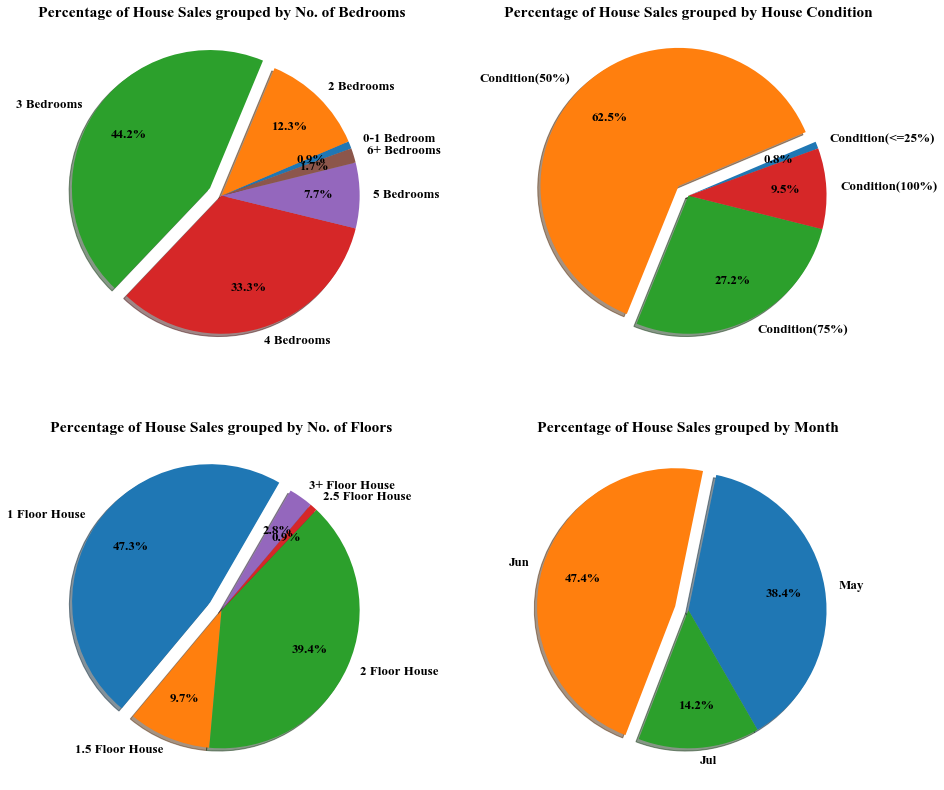

In [15]:
#Percentage of House Sales grouped by No. of Bedrooms, House Condition, No. of Floors & Month
fig, axes = plt.subplots(2,2,figsize=(14,14))

plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman, serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=13
labels =['0-1 Bedroom','2 Bedrooms','3 Bedrooms','4 Bedrooms','5 Bedrooms','6+ Bedrooms']
count = [40, 566, 2032, 1531, 353, 78]
explode = (0,0, 0.1,0,0,0)
axes[0,0].pie(count,explode=explode,labels=labels,pctdistance=0.7,
       autopct='%1.1f%%', labeldistance=1.1,shadow=True, startangle=20)
axes[0,0].set_title("Percentage of House Sales grouped by No. of Bedrooms")


labels =['Condition(<=25%)','Condition(50%)','Condition(75%)','Condition(100%)']
count = [38, 2875, 1252, 435]
explode = (0,0.1,0,0)
axes[0,1].pie(count,explode=explode,labels=labels, pctdistance=0.7,
       autopct='%1.1f%%', labeldistance=1.1, shadow=True, startangle=20)
axes[0,1].set_title("Percentage of House Sales grouped by House Condition")


labels =['1 Floor House','1.5 Floor House','2 Floor House','2.5 Floor House','3+ Floor House']
count = [2174, 444, 1811, 41, 130]
explode = (0.1,0, 0,0,0)
axes[1,0].pie(count,explode=explode,labels=labels,
       pctdistance=0.7,autopct='%1.1f%%',labeldistance=1.1,shadow=True, startangle=60 )
axes[1,0].set_title("Percentage of House Sales grouped by No. of Floors")



labels =['May','Jun','Jul']
count = [1768, 2179, 653]
explode = (0,0.1, 0)
axes[1,1].pie(count,explode=explode,labels=labels,pctdistance=0.7,
       autopct='%1.1f%%', labeldistance=1.1,shadow=True, startangle=-60)
axes[1,1].set_title("Percentage of House Sales grouped by Month")

for ax in axes.flat:
    ax.figure.tight_layout(pad=3)
    

In [16]:
# Statistics of the 'price' dataset feature. 
data['price'].describe().round(2)

count        4551.00
mean       557905.90
std        563929.87
min          7800.00
25%        326264.29
50%        465000.00
75%        657500.00
max      26590000.00
Name: price, dtype: float64

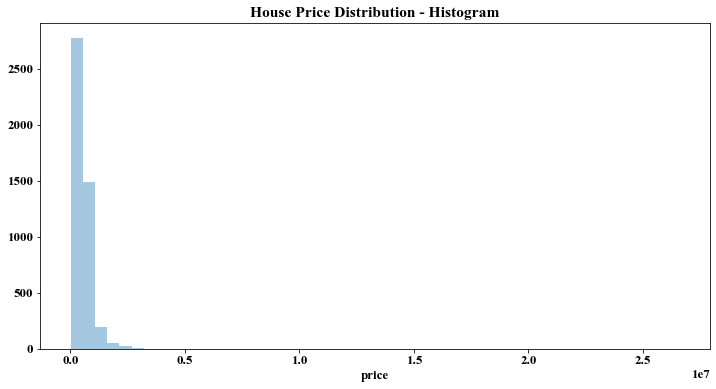

In [17]:
# House 'price' column data Distribution (Histogram). As it can be observed,there are a few houses sold with value above
# 3,000,000 therefore prices greater than this amount can be considered as outliers. 
plt.figure(figsize=(12,6))
sns.distplot(data['price'],kde=False)
plt.title('House Price Distribution - Histogram');

In [18]:
# As it has been determined, sold houses of price up to 3 million, comprise the 99.8% of the 'feature' records.
# For visualization purposes, the upper 'price' feature limit for most of the following plots/charts of this section will 
# be 3,000,000
up_to_3_mil_data_perc=100*(data['price'][data['price']<=3000000].count()/len(data))
up_to_3_mil_data_perc

99.8022412656559

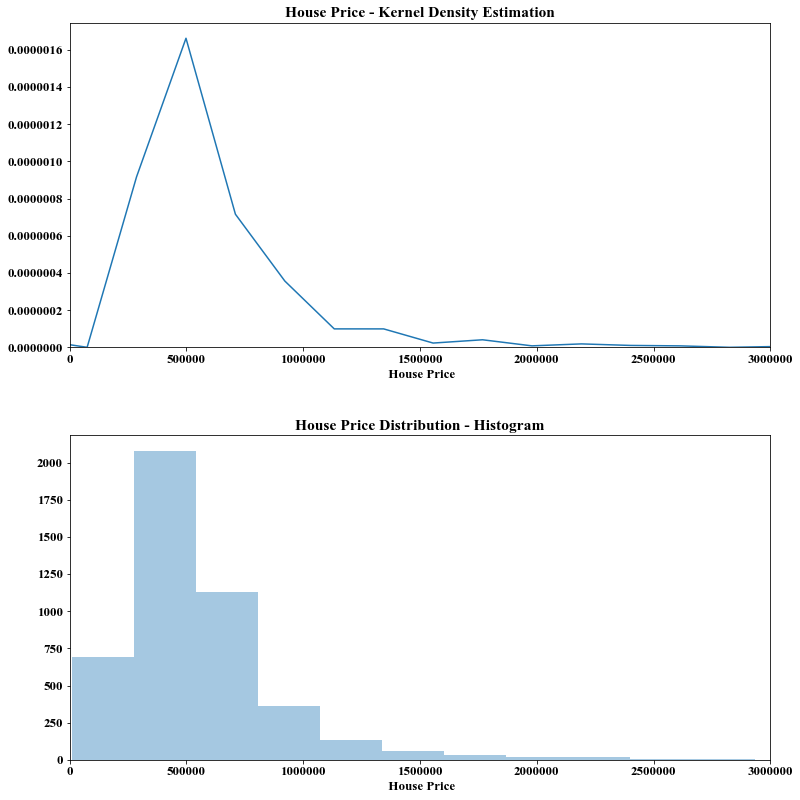

In [19]:
# 1st plot) House 'price' column Kernel Density Estimation plot for price <= 3,000,000
# 2nd plot) House 'price' column values distribution - Histogram for price <= 3,000,000
fig,axs=plt.subplots(2,1,figsize=(12,12))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13
sns.distplot(data['price'],kde=True,hist=False,ax=axs[0])
axs[0].set_title('House Price - Kernel Density Estimation')
sns.distplot(data['price'],kde=False,bins=100,ax=axs[1])
axs[1].set_title('House Price Distribution - Histogram')

for ax in axs.flat:
    ax.set_xlabel(' House Price')
    ax.set_xlim(0,3000000)
    ax.figure.tight_layout(pad=3);

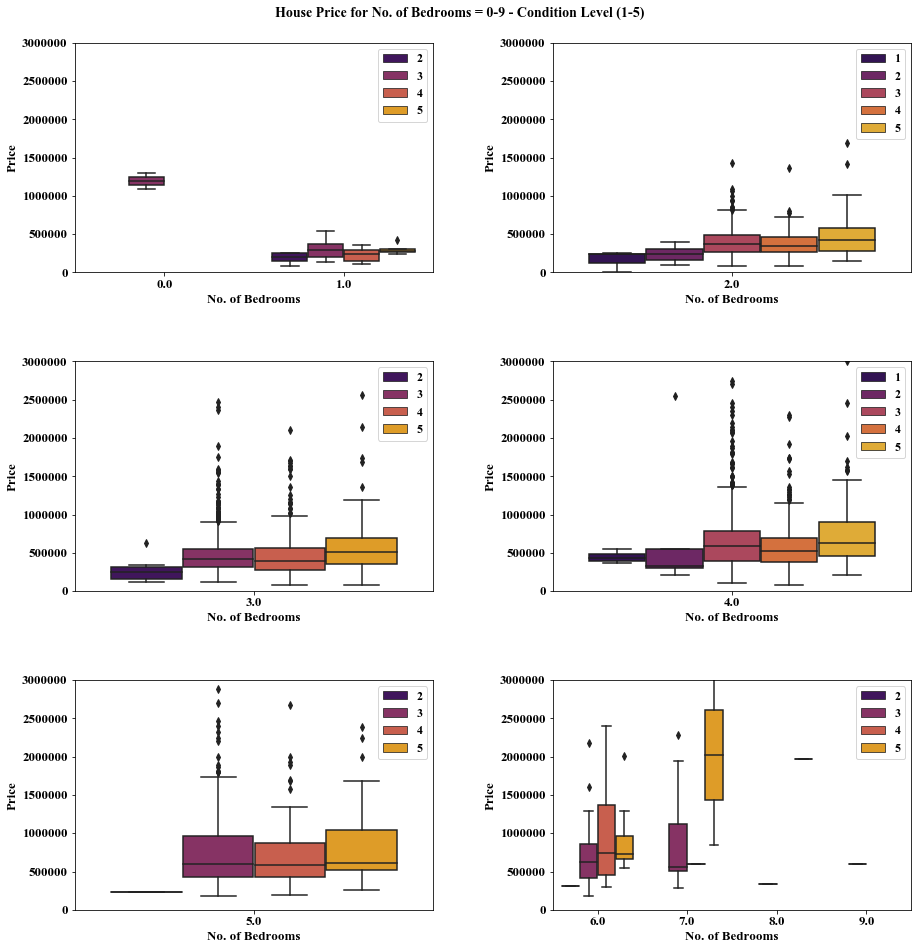

In [20]:
# Boxplots of House 'Price' grouped by the number of 'Bedrooms', based on House 'Condition'.

# By observing the boxplot, an interesting finding is the fact that while prices of houses sold with 100% condition(group 5) 
# have higher median values(as expected),the median values of houses sold with house condition equal to 50% (group 3)
# for most number of bedrooms are higher than the houses sold with level 4(75%) or of similar value. In addition, most of the 
# distributions are right skewed, which means that for the same number of bedrooms and condition house prices vary,
# as there are other factors that affect the price of a house (e.g the other dataset features)
fig,axs=plt.subplots(3,2,figsize=(14,14))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13
sns.boxplot(x='bedrooms',data=data[data['bedrooms']<=1],y='price',hue='condition',palette='inferno',ax=axs[0,0])

sns.boxplot(x='bedrooms',data=data[data['bedrooms']==2],y='price',hue='condition',palette='inferno',ax=axs[0,1])

sns.boxplot(x='bedrooms',data=data[data['bedrooms']==3],y='price',hue='condition',palette='inferno',ax=axs[1,0])

sns.boxplot(x='bedrooms',data=data[data['bedrooms']==4],y='price',hue='condition',palette='inferno',ax=axs[1,1])

sns.boxplot(x='bedrooms',data=data[data['bedrooms']==5],y='price',hue='condition',palette='inferno',ax=axs[2,0])

sns.boxplot(x='bedrooms',data=data[data['bedrooms']>=6],y='price',hue='condition',palette='inferno',ax=axs[2,1])


for ax in axs.flat:
    ax.set_ylim(0,3000000)
    ax.legend(loc='best',fontsize=12)
    ax.set_ylabel('Price')
    ax.set_xlabel('No. of Bedrooms')
    ax.figure.tight_layout(pad=4)
    fig.suptitle("House Price for No. of Bedrooms = 0-9 - Condition Level (1-5)", fontweight='bold',fontsize=14);

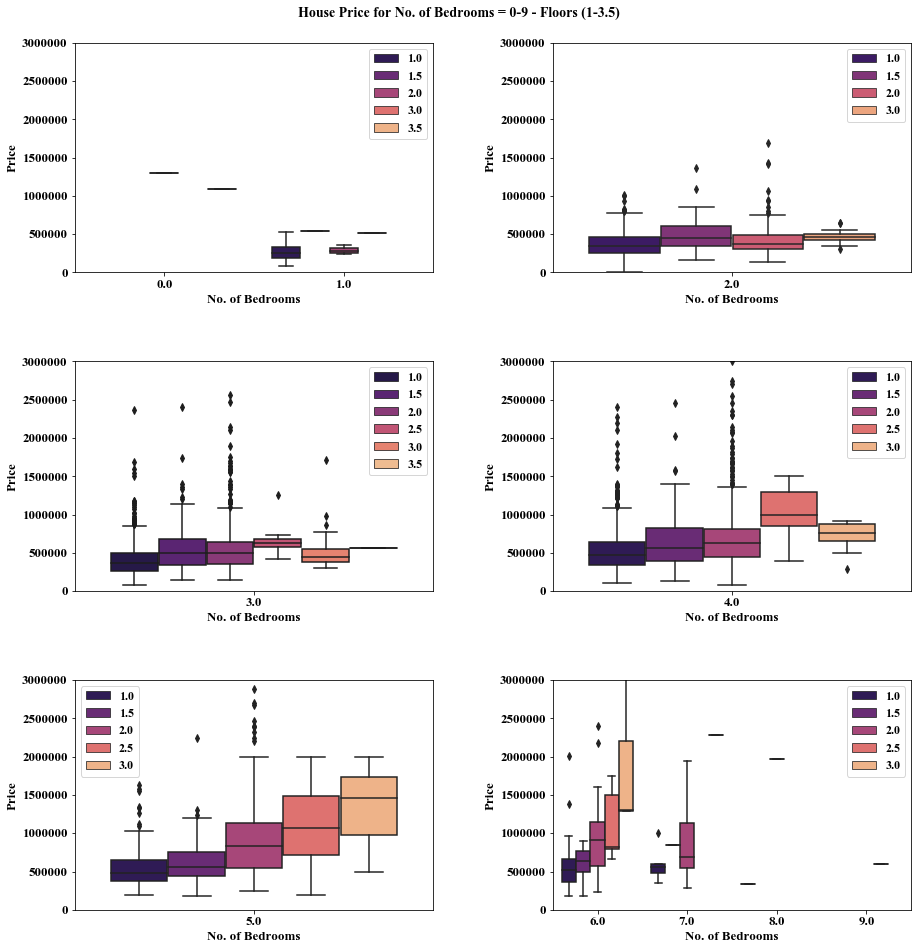

In [21]:
# Boxplots of House 'Price' grouped by the number of 'Bedrooms', based on number of 'floors'.
# Based on the boxplots, it can be observed that for houses with > = 4 bedrooms, the median value of the house 'price' increases
# as the number of floors increases, whereas the median 'price' feature values for houses with 1-3 bedrooms do not differ
# significantly between each other with respect to the number of house floors
fig,axs=plt.subplots(3,2,figsize=(14,14))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13
sns.boxplot(x='bedrooms',data=data[data['bedrooms']<=1],y='price',hue='floors',palette='magma',ax=axs[0,0])

sns.boxplot(x='bedrooms',data=data[data['bedrooms']==2],y='price',hue='floors',palette='magma',ax=axs[0,1])

sns.boxplot(x='bedrooms',data=data[data['bedrooms']==3],y='price',hue='floors',palette='magma',ax=axs[1,0])

sns.boxplot(x='bedrooms',data=data[data['bedrooms']==4],y='price',hue='floors',palette='magma',ax=axs[1,1])

sns.boxplot(x='bedrooms',data=data[data['bedrooms']==5],y='price',hue='floors',palette='magma',ax=axs[2,0])

sns.boxplot(x='bedrooms',data=data[data['bedrooms']>=6],y='price',hue='floors',palette='magma',ax=axs[2,1])


for ax in axs.flat:
    ax.set_ylim(0,3000000)
    ax.legend(loc='best',fontsize=12)
    ax.set_ylabel('Price')
    ax.set_xlabel('No. of Bedrooms')
    ax.figure.tight_layout(pad=4)
    fig.suptitle("House Price for No. of Bedrooms = 0-9 - Floors (1-3.5)", fontweight='bold',fontsize=14);

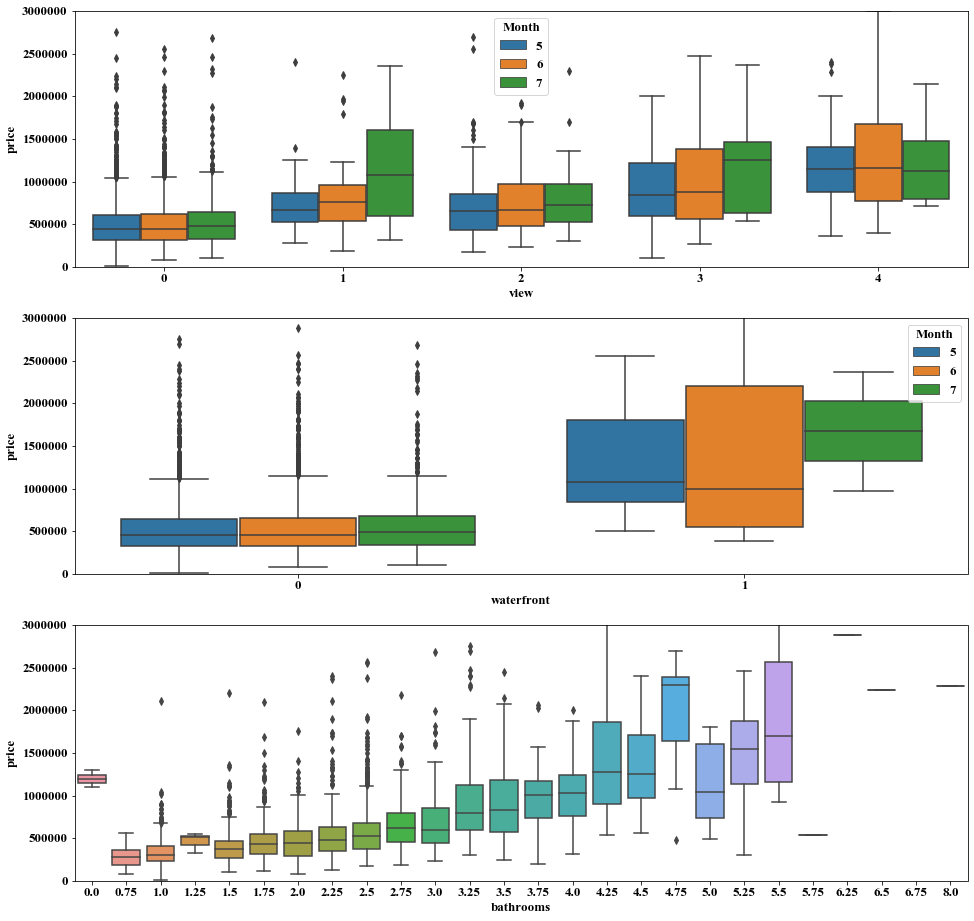

In [22]:
# Figure 1: House prices grouped by view (Levels 0-4, where 0 is minimum view and 4 maximum view) with respect to the month
# the houses have been sold (Months 5-7 --> May-July). For houses with minimum or maximum view, the median value does not seem
# to differ significantly with respect to the Month sold. For houses with view level 1-3, the median price value seems
# to be higher in July.
# Figure 2: House prices grouped by the 'waterfront' dataset feature from May to July. The median value of houses with 
# waterfront sold in July is much higher compared to the other two months.
# Figure 3: House prices grouped by the number of house bathrooms from May to July. As expected, house price gets higher as
# the number of bathrooms increases
fig,axs=plt.subplots(3,1,figsize=(16,16))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13
sns.boxplot(x='view',y='price',data=data,hue='Month',ax=axs[0])

sns.boxplot(x='waterfront',y='price',hue='Month',data=data,ax=axs[1])

sns.boxplot(x='bathrooms',y='price',data=data,ax=axs[2])
for ax in axs.flat:
    ax.set_ylim(0,3000000);


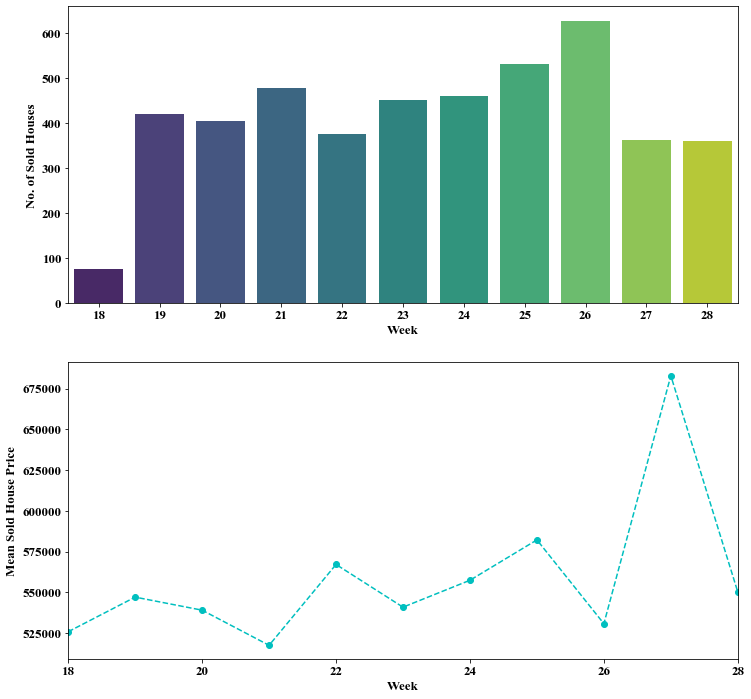

In [23]:
# Figure 1:Number of Houses sold per week from 2014-05-05 to 2014-07-10. Compared to the other weeks, Week 26 (~ 19-26 June) 
# was the week where most houses were sold
# Figure 2: Mean sold house price per week. On average, week 27(~27 June-03 July 2014) was the week where most expensive houses
# were sold
fig,axs=plt.subplots(2,1,figsize=(12,12))
sns.countplot('Week',data=data,palette='viridis',ax=axs[0])
axs[0].set_ylabel('No. of Sold Houses')
data.groupby('Week').mean()['price'].plot(marker='o',linestyle='--',color='c',ax=axs[1])
axs[1].set_ylabel('Mean Sold House Price');

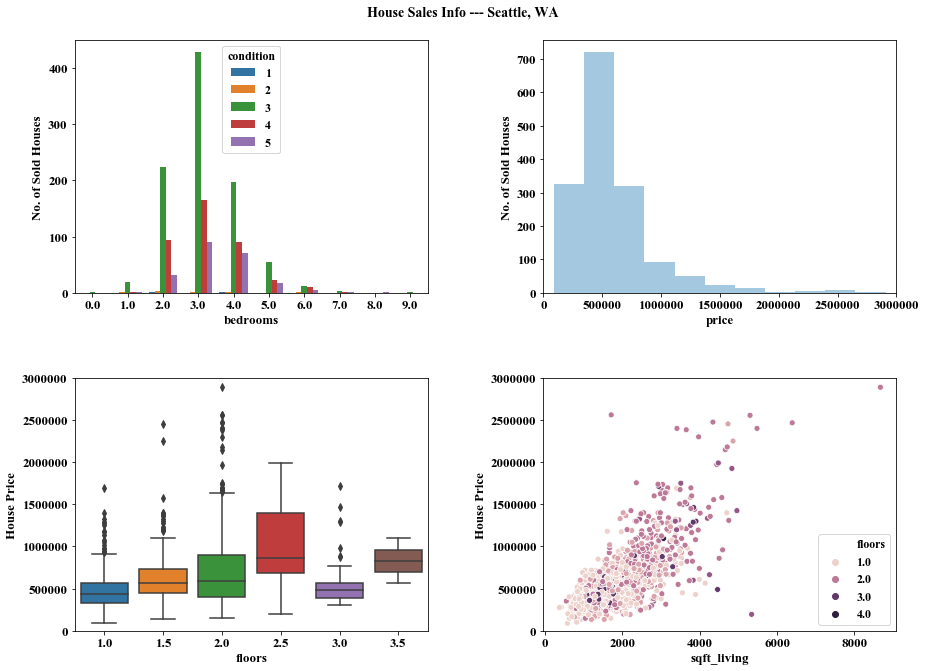

In [24]:
# As an example, the figures presented in this cell provide information regarding the House Sales In Seattle, WA
# a) Total number of houses sold in Seattle for different number of bedrooms with respect to the house condition
# b) Histogram presenting the sold houses price distribution
# c) Boxplot presenting the sold houses price grouped by the number of floors
# d) scatterplot providing the relationship between the price of the sold houses and their sqft_living
fig,axs=plt.subplots(2,2,figsize=(14,10))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12
sns.countplot('bedrooms',data=data[data['city']=='Seattle'],hue='condition',ax=axs[0,0])
axs[0,0].set_ylabel('No. of Sold Houses')
sns.distplot(data['price'][data['city']=='Seattle'],kde=False,ax=axs[0,1])
axs[0,1].set_ylabel('No. of Sold Houses')
axs[0,1].set_xlim(0,3000000)
sns.boxplot(x='floors',y='price',data=data[data['city']=='Seattle'],ax=axs[1,0])
axs[1,0].set_ylabel('House Price')
axs[1,0].set_ylim(0,3000000)
sns.scatterplot(x='sqft_living',y='price',data=data[data['city']=='Seattle'],hue='floors',ax=axs[1,1])
axs[1,1].set_ylabel('House Price')
axs[1,1].set_ylim(0,3000000)
for ax in axs.flat:
   
    ax.figure.tight_layout(pad=4)
    fig.suptitle("House Sales Info --- Seattle, WA", fontweight='bold',fontsize=14);

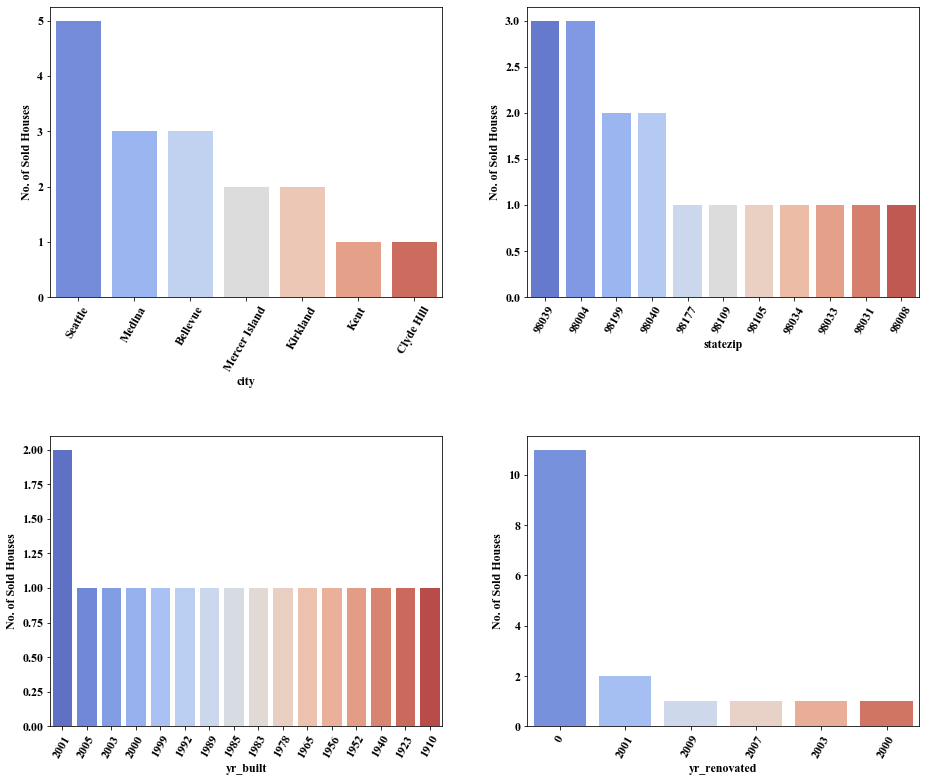

In [25]:
# Here, the task is to determine which of the selected dataset features ('city','statezip','yr_built' & 'yr_renovated') 
# comprise records where the sold house price is very high (>= 2,500,000). As it can be observed, Seattle, Medina and Bellevue
# are the cities where the most expensive houses were sold. In addition, WA98039, WA98004, WA98199 & WA98040 are the statezips 
# that comprise the majority of these expensive sold houses. The dates that these expensive houses were built varies from
# 1910 to 2001. Most of these houses have not been renovated & those that have been renovated, they were between 2000 & 2009.

city_val=data[data['price']>=2500000].groupby('city').count()['price'].sort_values(ascending=False).index

data['statezip']=data['statezip'].apply( lambda x: int(x[-5:]))# lambda func to keep the numbers & remove state shortcut('WA')
data['statezip']=data['statezip'].astype(object)
zip_val=data[data['price']>=2500000].groupby('statezip').count()['price'].sort_values(ascending=False).index

built_val=data[data['price']>=2500000].groupby('yr_built').count()['price'].sort_values(ascending=False).index

renov_val=data[data['price']>=2500000].groupby('yr_renovated').count()['price'].sort_values(ascending=False).index


fig,axs=plt.subplots(2,2,figsize=(14,12))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12
sns.countplot(x='city',data=data[data['price']>=2500000],order=city_val,palette='coolwarm',ax=axs[0,0])

sns.countplot(x='statezip',data=data[data['price']>=2500000],order=zip_val,palette='coolwarm',ax=axs[0,1])

sns.countplot(x='yr_built',data=data[data['price']>=2500000],order=built_val,palette='coolwarm',ax=axs[1,0])

sns.countplot(x='yr_renovated',data=data[data['price']>=2500000],order=renov_val,palette='coolwarm',ax=axs[1,1])

for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=60)
    ax.set_ylabel('No. of Sold Houses')
    ax.figure.tight_layout(pad=4)



In [26]:
# 'Street' first five entries
data['street'].head()


0        18810 Densmore Ave N
1             709 W Blaine St
2    26206-26214 143rd Ave SE
3             857 170th Pl NE
4           9105 170th Ave NE
Name: street, dtype: object

In [27]:
# Function to remove house numbers so as to create a more 'generic' form of the street addresses
def streetadd(x):
    if ' ' in x:
        return x[x.find(" ")+1 :]
    
    else:
        return x
    
data['street']=data['street'].apply(streetadd)

In [28]:
# 'street' column has been updated and first (house) numbers have been removed
data['street'].head(10)

0    Densmore Ave N
1       W Blaine St
2      143rd Ave SE
3       170th Pl NE
4      170th Ave NE
5        NE 88th St
6      174th Ave NE
7       SE 253rd Pl
8       SE 129th St
9       55th Ave NE
Name: street, dtype: object

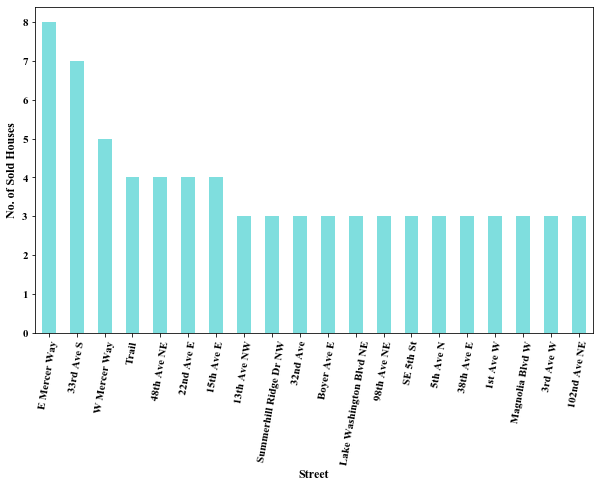

In [29]:
# In this example, the task is to locate the addresses where three or more houses were sold with price > = 800,000.
# As it can be observed from the bar chart, E Mercer Way, 33rd Ave S & W Mercer Way were the most popular addresses
# as 8, 7 & 5 houses were sold with price > = 800,000  between May-July 2014 in WA respectively,  

str_val=data[data['price']>=800000].groupby('street').count()['price'].sort_values(ascending=False)
str_val=str_val.loc[(str_val>=3)]

plt.figure(figsize=(10,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=11

str_val.plot(kind='bar',color="c", alpha=0.5, linewidth=2)
plt.xlabel('Street',fontsize=12)
plt.ylabel('No. of Sold Houses',fontsize=12)
plt.xticks(rotation=80);


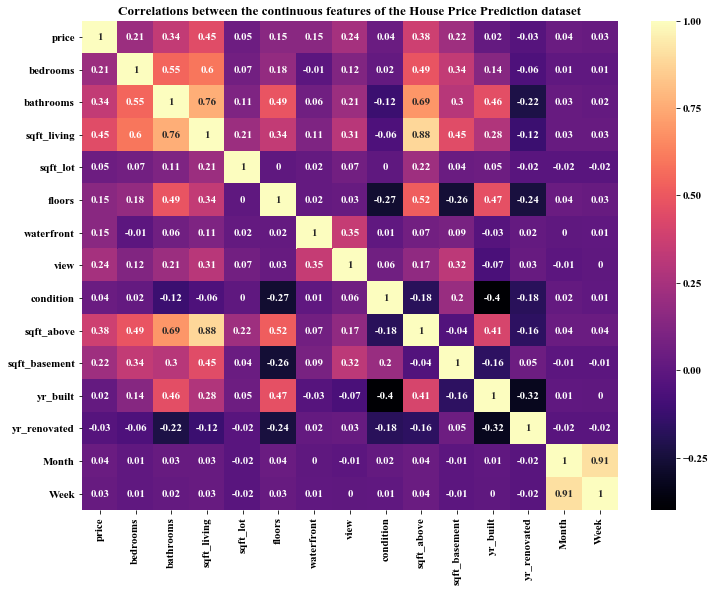

In [30]:
# Heatmap providing the correlations between the continuous features of the House Price Predictions dataset.
# Correlation varies between -1 and 1, where a) values close to 1 indicate positive correlation, b) values close to -1
# indicate negative correlation between two variables and c) values close to zero indicate no correlation. 
plt.figure(figsize=(12,9))
plt.title('Correlations between the continuous features of the House Price Prediction dataset')
sns.heatmap(data.corr().round(2),annot=True,cmap='magma');

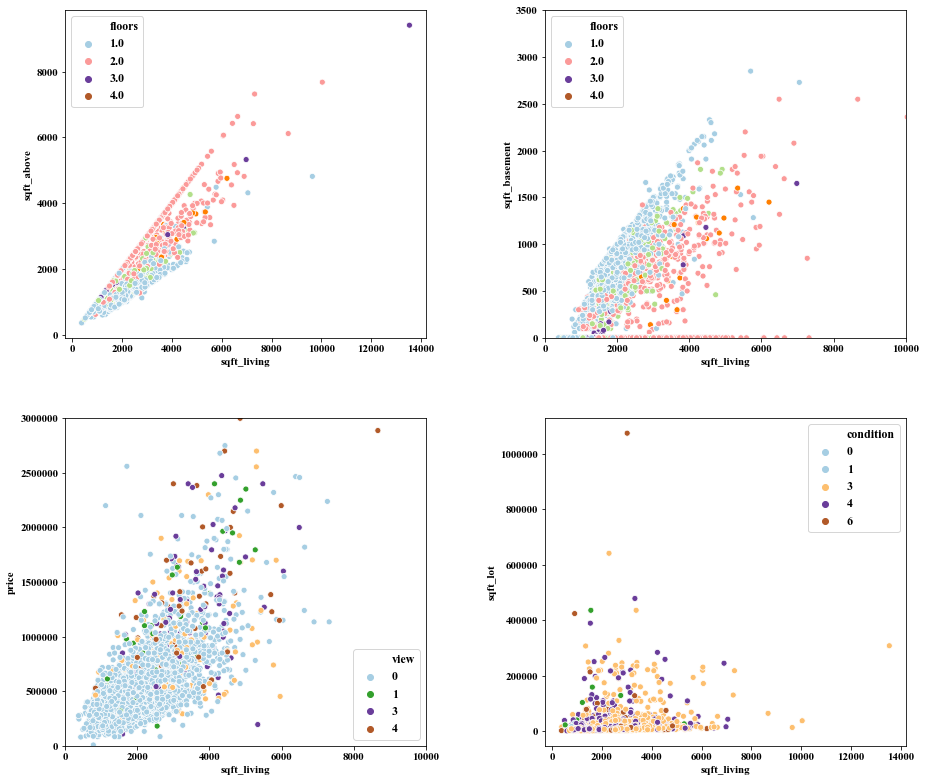

In [31]:
# Scatterplots, based on different correlation values, presenting the relationships between 'sqft_living' feature and selected
# continuous features of the dataset. As expected, for different correlation values, different scatter plots are observed.
# a) 'sqft_above' - 'sqft_living' (correlation value=0.88) -- hue = floors
# b) 'sqft_basement' - 'sqft_living' (correlation value = 0.45) -- hue = floors
# a) 'price' - 'sqft_living' (correlation value=0.45) -- hue = view
# b) 'sqft_lot' - 'sqft_living' (correlation value = 0.21) -- hue = condition

fig,axs=plt.subplots(2,2,figsize=(14,12))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12
sns.scatterplot(x='sqft_living',y='sqft_above',data=data,palette='Paired',hue='floors',ax=axs[0,0])

sns.scatterplot(x='sqft_living',y='sqft_basement',data=data,palette='Paired',hue='floors',ax=axs[0,1])
axs[0,1].set_xlim(0,10000)
axs[0,1].set_ylim(0,3500)
sns.scatterplot(x='sqft_living',y='price',data=data,palette='Paired',hue='view',ax=axs[1,0])
axs[1,0].set_ylim(0,3000000)
axs[1,0].set_xlim(0,10000)
sns.scatterplot(x='sqft_living',y='sqft_lot',data=data,palette='Paired',hue='condition',ax=axs[1,1])

for ax in axs.flat:
    
    ax.figure.tight_layout(pad=4)


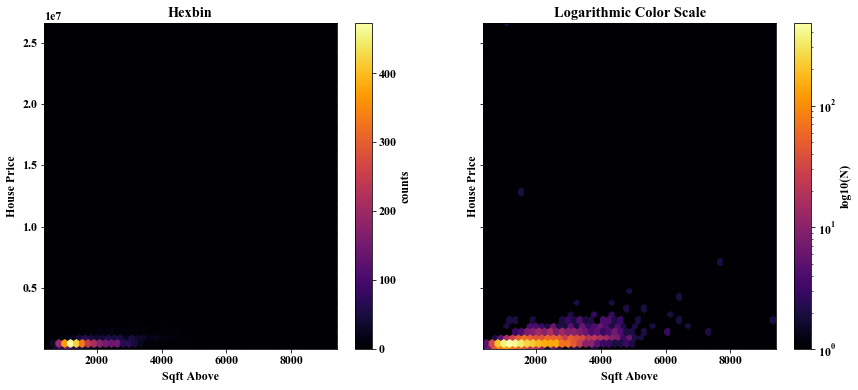

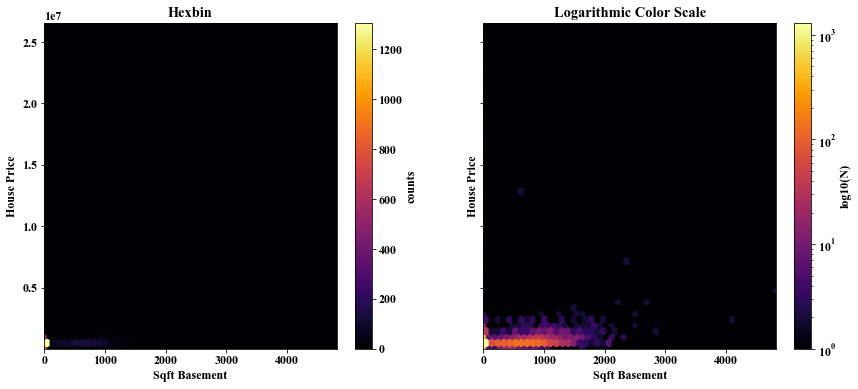

In [32]:
# In this example, the 'sqft_above'-'price' & 'sqft_basement'-'price' hexbin plots are presented that provide another option,
# similar to a scatterplot, with respect to highlighting the relationships between dataset features. The highest density
# area(presented as bright colored hexagon bins) is the one where the data are concentrated(distributed) the most.

x = data['sqft_above']
y = data["price"]
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(13, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Hexbin")
ax.set_xlabel("Sqft Above")
ax.set_ylabel("House Price")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Logarithmic Color Scale")
ax.set_xlabel("Sqft Above")
ax.set_ylabel("House Price")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')



x = data['sqft_basement']
y = data["price"]
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(13, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Hexbin")
ax.set_xlabel("Sqft Basement")
ax.set_ylabel("House Price")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Logarithmic Color Scale")
ax.set_xlabel("Sqft Basement")
ax.set_ylabel("House Price")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

In [33]:
# Correlations between the 'price' feature and the other numeric variables. The 'sqft_living'&'sqft_above'
# features are the ones with the highest positive correlation coefficient values with respect to the 'price' dataset feature
data.corr(method='pearson')['price'].sort_values(ascending=False).drop('price')


sqft_living      0.445494
sqft_above       0.380661
bathrooms        0.341126
view             0.242587
sqft_basement    0.217782
bedrooms         0.210228
floors           0.152758
waterfront       0.150083
sqft_lot         0.051347
Month            0.040502
condition        0.038892
Week             0.031640
yr_built         0.021757
yr_renovated    -0.029034
Name: price, dtype: float64

C:\Users\geoto\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


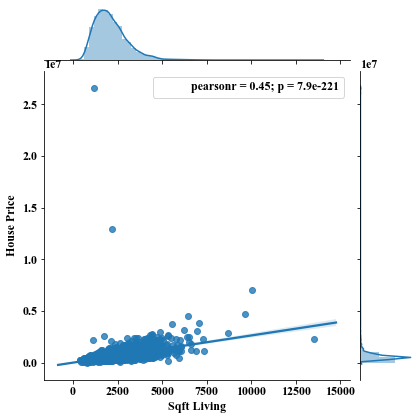

In [34]:
# Before splitting the dataset into training and test samples,the relationship of the two most correlated dataset features
# 'price' & 'sqft_living' is presented again, in the form of a 'jointplot'. As it can be observed for house prices > 3,000,000,
# the presence of outliers is clear. These outliers can have a negative impact on the trainin process of the deep learning
# model,thus the dataset will only include samples with house price up to 3,000,000.

import scipy.stats as stats

jointp=sns.jointplot(x=data['sqft_living'], y=data['price'],height=6, kind='reg')
plt.xlabel('Sqft Living')
plt.ylabel('House Price')
jointp.annotate(stats.pearsonr)
plt.show()

In [35]:
# Apart from selecting only the records with house price <=3,000,000, the 'country' feature is  dropped from the 
# dataset as it cannot contribute to the training process of the neural network. To exemplify, the 'Country' feature contains
# only USA records so there is no point using it as there are no relationships to be learnt during the training process.

data=data.drop(['country'],axis=1)
data=data[data['price']<=3000000]

In [36]:
# The other 'object' type features that need to be addressed are the 'street','city' and 'statezip'. Due to the fact that they
# are of categorical type, it is to be decided whether they should be used during the network training process and if so, in
# what form, in order to contribute to the 'learning' process of the ML model.
data.select_dtypes(['object']).columns

Index(['street', 'city', 'statezip'], dtype='object')

In [37]:
# 'city' feature consists of 44 unique entries
len(data['city'].unique())

44

In [38]:
# 'city' feature unique entries
data['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [39]:
# There are several ways of converting the 'city' entries into a meaningful group of values. One option is to group the cities
# based on the location of each city with respect to the state of Washington (i.e. NW,NE,SW,SE)
# In this case, due to the small number of the 'city' feature unique values,each entry has been replaced with two new dataset  
# columns,based on the 'latitude' and 'longitude' of each city (latitude & longitude values of each city are available 
# on the web)
lat= pd.DataFrame({'City': ['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond','Maple Valley','North Bend', 
                            'Lake Forest Park', 'Sammamish', 'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton','Carnation', 'Snoqualmie', 'Duvall', 'Burien',
                            'Covington','Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish','Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac',
        'Medina','Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'],
                  'Latit': [47.75, 47.62, 47.384,47.596 ,47.675,47.367, 47.495, 47.759,47.618,47.307,
                           47.39, 47.776, 47.309,47.685,47.541,47.756,47.430,47.567,47.482,
                           47.647,47.528,47.742,47.470,47.358,47.622,47.757, 47.538, 47.570,
                           47.308, 47.352,47.631,47.278, 47.709,47.473,47.447,47.646,47.453,
                           47.620, 47.204,47.539, 47.264,47.585,47.523,47.248]})

long= pd.DataFrame({'City': ['Shoreline','Seattle','Kent','Bellevue', 'Redmond','Maple Valley','North Bend', 
                            'Lake Forest Park', 'Sammamish', 'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton','Carnation', 'Snoqualmie', 'Duvall', 'Burien',
                            'Covington','Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish','Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac',
        'Medina','Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'],
                  'Longit': [-122.34,-122.35,  -122.218, -122.153, -122.116, -122.038, -121.789,-122.287,-122.054, -122.228,
                             -122.315,-122.205,-122.33,-122.19, -122.043, -122.147, -122.359,-121.88, -122.217,
                             -121.914,-121.825, -121.98, -122.346,-122.122, -122.068, -122.244,-122.155,-122.22,
                            -122.003, -121.983,-122.217,-122.252,-121.360,-122.260, -122.459,-122.217,-122.321,
                            -122.227,-121.991, -121.809, -122.250, -122.198, -121.927, -122.312]})

data['lat']=data['city'].replace(lat.set_index('City')['Latit'])
data['long']=data['city'].replace(long.set_index('City')['Longit'])
# 'city' feature can now be dropped as it has been replaced by the 'lat' and 'long' columns
data=data.drop(['city'],axis=1)

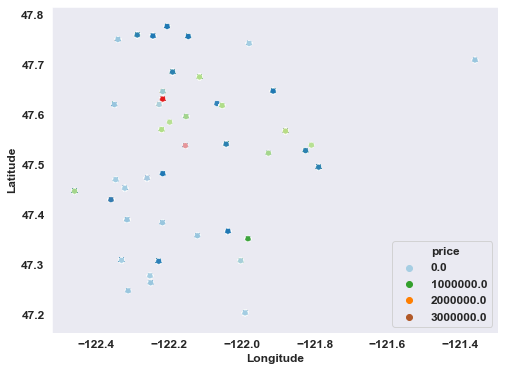

In [40]:
# Scatterplot presenting the location of each city based on  longitude-latitude values
plt.figure(figsize=(8,6))
sns.set_style("dark")
sns.scatterplot(x='long',y='lat',
                data=data,hue='price',linestyle='dashed',marker='o',
                palette='Paired',alpha=0.9)
plt.xlabel('Longitude',fontweight='bold')
plt.ylabel('Latitude',fontweight='bold');

In [41]:
# Length of unique 'statezip' values
len(data['statezip'].unique())

77

In [42]:
# Mean house sold price grouped by statezip
st_mn_price=data.groupby('statezip').mean()['price']
st_mn_price=pd.DataFrame(st_mn_price)
st_mn_price.reset_index(level=0, inplace=True)
st_mn_price.head()

,statezip,price
0,98001,2.616399e+05
1,98002,2.299344e+05
2,98003,2.994256e+05
3,98004,1.207564e+06
4,98005,7.787792e+05


In [43]:
# The statezip with the highest mean 'housesold' price (1,880,215 $) is 98039 
 
statezip_mean_price_val=st_mn_price['price'].values
st_mn_price[st_mn_price['price']==st_mn_price['price'].max()]

,statezip,price
24,98039,1880215.0


In [44]:
# Grouping the 'statezip' features into classes based on the mean housesold price for each statezip.
# (Classes 'A-F', where 'A' represents the statezips with the highest mean housesold price & 'F' the statezips with the lowest
# average housesold price)
st_zip_class=[]
for x in statezip_mean_price_val:
    if x<=250000:
        x="F"
        st_zip_class.append (x)
    elif x>250000 and x<=500000:
        x='E'
        st_zip_class.append (x)
    elif x>500000 and x<=750000:
        x='D'
        st_zip_class.append (x) 
    elif x>750000 and x<=1000000:
        x='C'
        st_zip_class.append (x) 
    elif x>1000000 and x<=1250000:
        x='B'
        st_zip_class.append (x) 
        
    elif x>1250000:
        x='A'
        st_zip_class.append (x)
        
# creating a new st_mn_price column comprising the st_zip_class appended values
st_mn_price['st_zip_class'] = st_zip_class   
# replacing the data['statezip'] entries with the st_zip_class values
data['statezip']=data['statezip'].replace(st_mn_price.set_index('statezip')['st_zip_class'])

In [45]:
# The 'statezip' column has been updated
data['statezip'].head()

0    E
1    C
2    E
3    D
4    D
Name: statezip, dtype: object

In [46]:
# Total value counts for each 'statezip' sub-group
data['statezip'].value_counts()

E    2041
D    1729
C     501
B     217
F      44
A      10
Name: statezip, dtype: int64

In [47]:
# The get_dummies function is employed to enable the convertion of categorical features into dummy/indicator features.
# The drop_first=True function is used to avoid the Dummy variable Trap,where two or more independent variables are highly
# correlated.By dropping one variable, this trap can be avoided.
state_dummies = pd.get_dummies(data['statezip'],drop_first=True)
data = data.drop('statezip',axis=1)
data = pd.concat([data,state_dummies],axis=1)

In [48]:
# As it can be observed, the dummy variables have been created and are part of the dataset (columns 'B - F')
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,street,Month,Week,lat,long,B,C,D,E,F
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,...,Densmore Ave N,5,18,47.750,-122.340,0,0,0,1,0
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,...,W Blaine St,5,18,47.620,-122.350,0,1,0,0,0
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,...,143rd Ave SE,5,18,47.384,-122.218,0,0,0,1,0


In [49]:
# Total number of unique 'street' entries
len(data['street'].unique())

2584

In [50]:
# The last 'object' data type column is the 'street' feature. In order to use this feature as input to the ML model, the use
# of the geographical coordinates (latitude, longitude) of each house with respect to its address would be an effective way
# to transform this 'object' type feature, as the model would be trained to find the relationship between each house location & 
# the sold house price. Unfortunately, due to the presence of a high number of unique house adresses, it would take a 
# significant amount of time to add these coordinates (as they are not included in this specific dataset) and since this
# feature transformation example has already been presented ('city' feature), the 'street' feature wil be dropped. 

data=data.drop(['street'],axis=1)

In [51]:
# Machine learning regression - Independent (X) and dependent (y) variables 
X = data.drop('price',axis=1)
y = data['price']

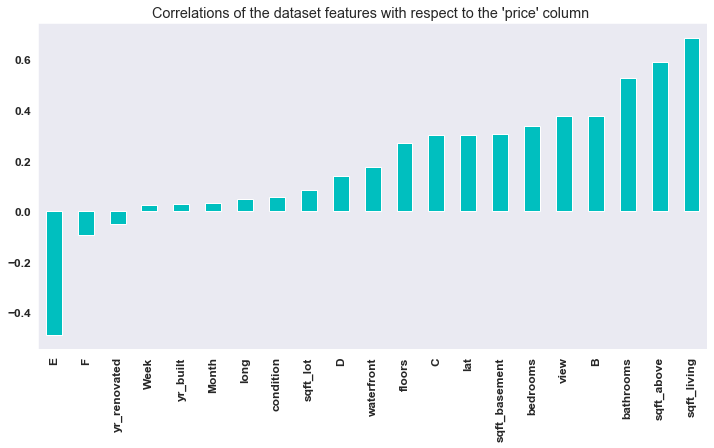

In [52]:
# Bar plot showing the correlations between the 'price' feature and the other numeric variables. The 'sqft_living'&'sqft_above'
# features are the ones with the highest positive correlation coefficient values with respect to the 'price' dataset feature

plt.figure(figsize=(12,6))
plt.rcParams['font.size']=12
data.corr(method='pearson')['price'].sort_values().drop('price').plot(kind='bar',color='c')
plt.title("Correlations of the dataset features with respect to the 'price' column ");

# Part B

***DEEP LEARNING - REGRESSION***

In [53]:
# Data are split into training and validation samples, thus the necessary libraries and functions are imported. 
# Testsize =0.1 --> 10% of the dataset records will be used for validation purposes to assess the model regression performance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [54]:
# Shapes of the training and test data
# Training Dataset consists of 4087 records -- 21 independent variables  and one dependent('price')
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(4087, 21) (455, 21)
(4087,) (455,)


In [55]:
# Scaling of independent variables(training & test samples). Training data are first fitted (to determine the mean & st_dev) 
# and then scaled, whereas test samples are scaled based on the 'mean' and 'st_dev' values  of the previously determined 
# training samples 
from sklearn.preprocessing import MinMaxScaler
reg_scaler = MinMaxScaler()
scaled_X_train= reg_scaler.fit_transform(X_train)
scaled_X_test = reg_scaler.transform(X_test)

In [56]:
# Importing the necessary libraries to create the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [57]:
# Importing keras initializers
from tensorflow.keras import initializers
import tensorflow as tf

# Use of the he_uniform initializer to set the initial random weights of the model layers. The bias initializer is set to a
# very small value (e.g. 0.01) to ensure that the neurons will fire at the beginning of the training process due to the use
# of a rectified linear unit as transfer (activation) function
initializer = tf.keras.initializers.he_uniform(seed=0)

# Initially, the network model is defined 
model = Sequential()
# First Hidden layer neurons are chosen to be 21  which is equal to the total number of indepedent features (inputs). The
# following hidden layers comprise approximately half the total number of neurons of the previous layers
# Selected Activation function has been the rectified linear unit
model.add(Dense(21, activation='relu', input_dim=(21),kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
model.add(Dense(11, activation='relu',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
model.add(Dense(6, activation='relu',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))

# The output layer consists of 1 neuron 
model.add(Dense(1, activation='relu',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))

# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and
# second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

In [58]:
# The model is ready to be trained for a maximum of 1000 epochs, with 32 samples per gradient update. At the end of each epoch,
# both training and validation losses are provided
model.fit(x=scaled_X_train,y=y_train.values,
          validation_data=(scaled_X_test,y_test.values),
          batch_size=32,epochs=1000)

Train on 4087 samples, validate on 455 samples
Epoch 1/1000
4087/4087 [==============================] - 0s 80us/sample - loss: 400583924647.5557 - val_loss: 468157180106.5494
Epoch 2/1000
4087/4087 [==============================] - 0s 30us/sample - loss: 400500224676.4865 - val_loss: 467917056634.6550
Epoch 3/1000
4087/4087 [==============================] - 0s 32us/sample - loss: 399828745358.0622 - val_loss: 466433169133.4330
Epoch 4/1000
4087/4087 [==============================] - 0s 30us/sample - loss: 397149404310.0798 - val_loss: 461767400085.6616
Epoch 5/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 390309227528.7693 - val_loss: 451279909647.1912
Epoch 6/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 376891529185.4329 - val_loss: 432584814294.9275
Epoch 7/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 355050398018.7090 - val_loss: 404083198712.6857
Epoch 8/1000
4087/4087 [==========================

4087/4087 [==============================] - 0s 29us/sample - loss: 33618898504.2838 - val_loss: 39999401392.1055
Epoch 127/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 33572763176.9650 - val_loss: 39933494944.9143
Epoch 128/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 33520312925.8312 - val_loss: 39928979580.9055
Epoch 129/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 33474677949.1656 - val_loss: 39778595816.3692
Epoch 130/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 33442358840.2486 - val_loss: 39613947962.5143
Epoch 131/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 33380839822.1248 - val_loss: 39822993552.0352
Epoch 132/1000
4087/4087 [==============================] - 0s 30us/sample - loss: 33345104856.6636 - val_loss: 39603541538.8835
Epoch 133/1000
4087/4087 [==============================] - 0s 31us/sample - loss: 33319599833.8537 - val_loss: 

Epoch 189/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 31390035705.4230 - val_loss: 36154279992.2637
Epoch 190/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 31341248578.1453 - val_loss: 35958793982.3121
Epoch 191/1000
4087/4087 [==============================] - 0s 31us/sample - loss: 31308981701.2459 - val_loss: 36080274699.8154
Epoch 192/1000
4087/4087 [==============================] - 0s 30us/sample - loss: 31273425685.2342 - val_loss: 36102545716.3253
Epoch 193/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 31254986083.5312 - val_loss: 35857323037.2571
Epoch 194/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 31199872808.0254 - val_loss: 36067722278.2593
Epoch 195/1000
4087/4087 [==============================] - 0s 32us/sample - loss: 31180063501.9682 - val_loss: 35766745317.5560
Epoch 196/1000
4087/4087 [==============================] - 0s 30us/sample - loss: 31148486988.73

Epoch 252/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 29842673980.6959 - val_loss: 33413294291.5516
Epoch 253/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 29805669654.3616 - val_loss: 33281082717.9604
Epoch 254/1000
4087/4087 [==============================] - 0s 27us/sample - loss: 29808548243.8874 - val_loss: 33246380322.3209
Epoch 255/1000
4087/4087 [==============================] - 0s 27us/sample - loss: 29775582559.2718 - val_loss: 33242221754.7956
Epoch 256/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 29758377969.7186 - val_loss: 33311302442.1978
Epoch 257/1000
4087/4087 [==============================] - 0s 30us/sample - loss: 29730384628.4120 - val_loss: 33026385523.9033
Epoch 258/1000
4087/4087 [==============================] - 0s 30us/sample - loss: 29736230282.6171 - val_loss: 33094368108.5890
Epoch 259/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 29707615430.18

Epoch 315/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 28802772590.1170 - val_loss: 31552559242.4088
Epoch 316/1000
4087/4087 [==============================] - 0s 31us/sample - loss: 28790214272.4071 - val_loss: 31549506724.2901
Epoch 317/1000
4087/4087 [==============================] - 0s 31us/sample - loss: 28776846719.5929 - val_loss: 31467852949.6615
Epoch 318/1000
4087/4087 [==============================] - 0s 30us/sample - loss: 28756273251.7191 - val_loss: 31342299952.9495
Epoch 319/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 28737091356.8759 - val_loss: 31413939152.7385
Epoch 320/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 28715126136.0763 - val_loss: 31291311385.3187
Epoch 321/1000
4087/4087 [==============================] - 0s 26us/sample - loss: 28699602088.2447 - val_loss: 31313466910.3824
Epoch 322/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 28683459827.78

4087/4087 [==============================] - 0s 30us/sample - loss: 27209454797.9525 - val_loss: 28873804536.6857
Epoch 441/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 27223412194.0592 - val_loss: 28754305489.8637
Epoch 442/1000
4087/4087 [==============================] - 0s 31us/sample - loss: 27203766411.0555 - val_loss: 28654262722.1099
Epoch 443/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 27182379457.2371 - val_loss: 28648396601.9516
Epoch 444/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 27176990069.6961 - val_loss: 28505016545.0549
Epoch 445/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 27174645981.7372 - val_loss: 28510834737.5121
Epoch 446/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 27157127799.3873 - val_loss: 28449225743.7538
Epoch 447/1000
4087/4087 [==============================] - 0s 29us/sample - loss: 27151228558.1874 - val_loss: 

4087/4087 [==============================] - 0s 26us/sample - loss: 26202378422.9019 - val_loss: 26658118592.9846
Epoch 567/1000
4087/4087 [==============================] - 0s 26us/sample - loss: 26177958591.0448 - val_loss: 26726129682.0044
Epoch 568/1000
4087/4087 [==============================] - 0s 27us/sample - loss: 26179010103.4969 - val_loss: 26768631711.2264
Epoch 569/1000
4087/4087 [==============================] - 0s 26us/sample - loss: 26199845700.8388 - val_loss: 26910564566.3648
Epoch 570/1000
4087/4087 [==============================] - 0s 25us/sample - loss: 26164014070.7296 - val_loss: 26728968419.3055
Epoch 571/1000
4087/4087 [==============================] - 0s 27us/sample - loss: 26156882122.4448 - val_loss: 26695624685.9956
Epoch 572/1000
4087/4087 [==============================] - 0s 27us/sample - loss: 26154210951.1720 - val_loss: 26859710344.7209
Epoch 573/1000
4087/4087 [==============================] - 0s 26us/sample - loss: 26149280863.4598 - val_loss: 

4087/4087 [==============================] - 0s 29us/sample - loss: 25724501925.8018 - val_loss: 25694173251.5165
Epoch 693/1000
4087/4087 [==============================] - 0s 26us/sample - loss: 25690854323.7074 - val_loss: 25773403325.0462
Epoch 694/1000
4087/4087 [==============================] - 0s 25us/sample - loss: 25705855386.6523 - val_loss: 25937096514.9538
Epoch 695/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 25685229114.0024 - val_loss: 25960014922.2681
Epoch 696/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 25669167755.9325 - val_loss: 25794035574.7165
Epoch 697/1000
4087/4087 [==============================] - 0s 27us/sample - loss: 25696989638.7492 - val_loss: 25864744476.1319
Epoch 698/1000
4087/4087 [==============================] - 0s 27us/sample - loss: 25677965792.2427 - val_loss: 25774800517.9077
Epoch 699/1000
4087/4087 [==============================] - 0s 27us/sample - loss: 25673306857.1373 - val_loss: 

4087/4087 [==============================] - 0s 27us/sample - loss: 25382438710.3068 - val_loss: 25435698374.0484
Epoch 819/1000
4087/4087 [==============================] - 0s 27us/sample - loss: 25379500965.5513 - val_loss: 25357159390.2418
Epoch 820/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 25391680002.8813 - val_loss: 25259396555.1121
Epoch 821/1000
4087/4087 [==============================] - 0s 26us/sample - loss: 25390424945.9379 - val_loss: 25414028114.7077
Epoch 822/1000
4087/4087 [==============================] - 0s 26us/sample - loss: 25388683303.5870 - val_loss: 25278536418.1802
Epoch 823/1000
4087/4087 [==============================] - 0s 25us/sample - loss: 25385833480.7693 - val_loss: 25317638205.3275
Epoch 824/1000
4087/4087 [==============================] - 0s 25us/sample - loss: 25380022360.4443 - val_loss: 25379000277.2396
Epoch 825/1000
4087/4087 [==============================] - 0s 27us/sample - loss: 25385325789.2361 - val_loss: 

4087/4087 [==============================] - 0s 26us/sample - loss: 25148537634.5133 - val_loss: 24967646194.4967
Epoch 945/1000
4087/4087 [==============================] - 0s 26us/sample - loss: 25184805431.2464 - val_loss: 24861950384.1055
Epoch 946/1000
4087/4087 [==============================] - 0s 26us/sample - loss: 25148666689.3310 - val_loss: 24934859974.0484
Epoch 947/1000
4087/4087 [==============================] - 0s 28us/sample - loss: 25150499656.7223 - val_loss: 24944887856.9495
Epoch 948/1000
4087/4087 [==============================] - 0s 27us/sample - loss: 25149937483.1025 - val_loss: 25088343061.3802
Epoch 949/1000
4087/4087 [==============================] - 0s 26us/sample - loss: 25198547615.7260 - val_loss: 24979303885.3626
Epoch 950/1000
4087/4087 [==============================] - 0s 25us/sample - loss: 25154350919.0937 - val_loss: 24994817714.9187
Epoch 951/1000
4087/4087 [==============================] - 0s 26us/sample - loss: 25161384626.0162 - val_loss: 

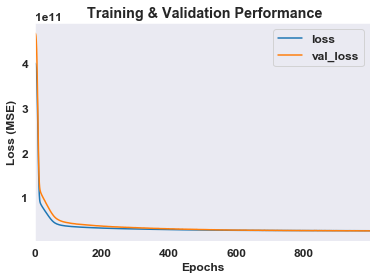

In [59]:
# Training and validation loss (MSE)
tr_val_loss = pd.DataFrame(model.history.history)
tr_val_loss.plot()
plt.title(' Training & Validation Performance',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel('Loss (MSE)',fontweight='bold');

In [60]:
# Model predicts the test 'price' samples based on the test 'input' samples
pred = model.predict(scaled_X_test)

In [61]:
# Importing the metrics
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error

In [62]:
# Root Mean Squared Error of predicted vs test 'price' values
np.sqrt(mean_squared_error(y_test,pred)).round(2)

156995.03

In [63]:
# The explained variance and the R squared (coefficient of determination) scores are provided. The explained variance score
# can be employed to determine the discrepancy between the predicted and actual values, whereas the R squared score
# provides the percentage of variation that can be explained by the  use of  Lin_Reg(least squares). Their difference in value
# is based on the fact that the latter takes into account the error of the mean

print(' Explained variance score: ',explained_variance_score(y_test,pred).round(4))
print(' R squared score: ',r2_score(y_test, pred).round(4))

 Explained variance score:  0.8251
 R squared score:  0.8245


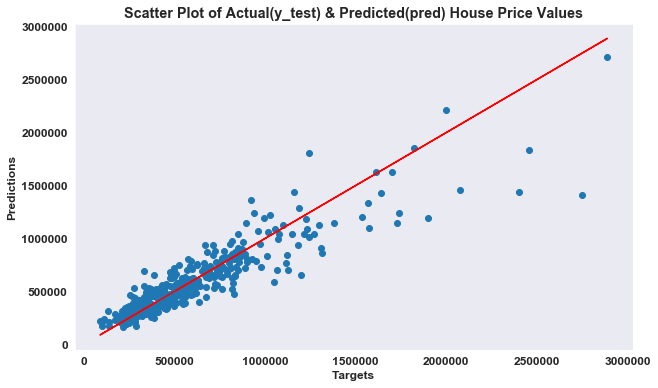

In [64]:
# Predicted values plot with respect to the line formed by the actual(test) values
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')
plt.xlabel('Targets',fontweight='bold')
plt.ylabel('Predictions',fontweight='bold')
plt.title('Scatter Plot of Actual(y_test) & Predicted(pred) House Price Values',fontweight='bold');



In [65]:
# Reshaping the y_test.values
test_val=y_test.values.reshape(len(scaled_X_test),1)
# calculating the training relative percentage error
error_perc=100*abs(test_val-pred)/test_val
# error_perc as pd.dataframe
error_perc=pd.DataFrame(error_perc)
error_perc.rename(columns={0:'Train_Rel_Err'},inplace=True)
# Summary statistics of training relative percentage error (targets-predictions)
error_perc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Train_Rel_Err,455.0,17.924505,18.124519,0.186406,5.894754,13.195297,25.32273,144.266528


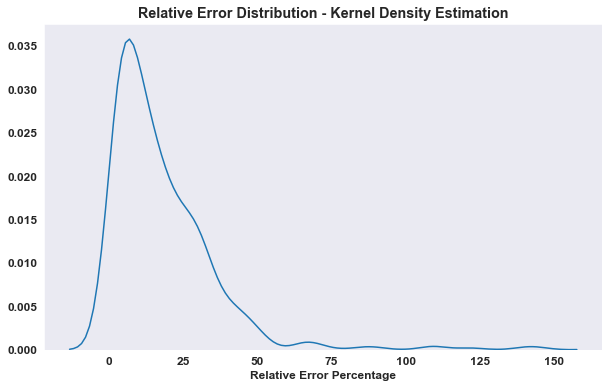

In [66]:
# Relative Error Percentage (Targets-Predictions)-Kernel Density Estimation plot
plt.figure(figsize=(10,6))
plt.xlabel('Relative Error Percentage',fontweight='bold')
plt.title('Relative Error Distribution - Kernel Density Estimation',fontweight='bold')
sns.distplot(error_perc,kde=True,hist=False);

In [67]:
# Selecting a 'random' house recond from the dataset to be used as a 'New Input' for the ML model
import random
random.seed(42)
data_index = random.randint(0,len(data))
# 'price' value is droped as this is the value that the model will try to predict
new_input = data.drop('price',axis=1).iloc[data_index]
new_input

bedrooms            2.00
bathrooms           1.50
sqft_living      1660.00
sqft_lot         4680.00
floors              1.00
waterfront          0.00
view                0.00
condition           5.00
sqft_above        830.00
sqft_basement     830.00
yr_built         1908.00
yr_renovated        0.00
Month               5.00
Week               21.00
lat                47.62
long             -122.35
B                   0.00
C                   0.00
D                   0.00
E                   1.00
F                   0.00
Name: 913, dtype: float64

In [68]:
# Scaling of new_input values
new_input = reg_scaler.transform(new_input.values.reshape(-1, 21))

In [74]:
# Model 'price' prediction
new_pred=model.predict(new_input)
new_pred=new_pred.astype(float).round(2)
print("Predicted 'House Price' is ",float(new_pred)) 

Predicted 'House Price' is  356196.72


In [70]:
# Actual (Target) House Price
new_target=data.iloc[data_index].head(1)
new_target

price    368000.0
Name: 913, dtype: float64

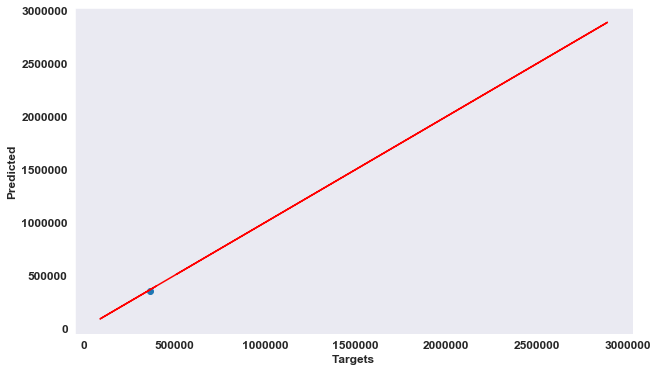

In [75]:
# New predicted value plot with respect to the line formed by the actual(test) values
plt.figure(figsize=(10,6))
plt.scatter(new_target,new_pred)
plt.plot(y_test,y_test,'r')
plt.xlabel('Targets',fontweight='bold')
plt.ylabel('Predicted',fontweight='bold');